# Statistics Primer

## Introduction
Points to cover:

- Frequency 
- Non-exceedance probability 
- Empirical to theoretical distributions

In [60]:
import numpy as np, matplotlib.pyplot as plt
from math import *
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

## Non-parametric frequentist analysis

Intro to come

The average height of a UK woman (as of 2010) was [161.6 cm](https://www.bbc.co.uk/news/uk-11534042). 

Text(0, 0.5, 'Frequency (count)')

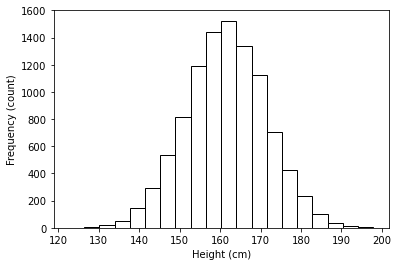

In [61]:
heights=np.random.normal(loc=161.6,scale=10,size=10000) # This takes a random sample of 10000 heights 
# representative of the UK female population

# Lets make a histogram of these heights
fig,ax=plt.subplots(1,1)
out=ax.hist(heights,bins=20,facecolor='white',edgecolor='black')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Frequency (count)")

The chart above should be familiar: it is a histogram, and indicates how many women have heights between the values marked by the edges of the vertical bars. A more common application for this type of "frequentist" analysis, though, is to ask how many -- or what *proportion* of observations (in this case, heights) -- fall above or below a given value. 

For example, imagine you were designing a chair for female scientists, whose dimensions should suit their heights. Because of engineering costs, it is decided that the chair should suit at least 98 % of women. (A specialist design will be developed for the shortest and tallest 1 %). 

To set the design standard, then, we therefore need to find the height that only 1 % of women are shorter than (the *lower* bound); *and* the height that only 1 % of women are taller than (the *upper* bound). Enter the "percentile" -- the value that 100-k % of the data exceed (where k is a value between 0 and 100). See below for how we compute the lower and upper bounds.  

In [62]:
lower=np.percentile(heights,1) # k is 1; We are finding the "1st percentile"
upper=np.percentile(heights,99) # k is 99; We are finding the "99th percentile"
print("Lower bound is %.1f cm\nUpper bound is %.1f cm"%(lower, upper))

Lower bound is 138.9 cm
Upper bound is 184.4 cm


So, if there are 1 million female scientists in the UK, how many will be excluded by the lower/upper bounds of our design standard? 

The answer to this should be quite obvious after a moment's pause. We have, by definition, excluded 2 % of the population with our design standard (i.e., 1 in 50 women). 2 % of 1 million is 20,000: this is how many scientists would need a custom chair. 

Why am I labouring this relatively obvious point? Because this general approach -- where we have a *sample* of data and must deduce some quantitiy relating to the *entire population* -- is common. Note that here, our *sample* is 10,000 strong, and the population comprises 1 million individuals. We used the sample to compute the percentiles and then used that (which we implicitly assume represents the scientists) to infer something about that wider population. 

Although this example deals with heights, I hope you can see how the same approach could be used to assess the threshold to identify, say, temperatures that are so hot they only occur on average once every 50 years (i.e., the 98 th percentile in a dataset of annual maximum temperatures) -- or indeed thresholds in any other meteorological quantity. 

Now imagine the chair designing committe come back to us and say that they were too hasty. They do not want to exclude 2 women in every hundred (or 1 in 50), and instead want to exclude only 1 in every 20,000. To make things a bit simpler, design innovations mean the chair can be adjusted to fit scientists regardless of how short they are; we therefore only need to identify a new upper bound to inform the chair's design (the height *exceeded* by only 1 in 20,000 women).  

Note an important point here: the language "1 in x" (meaning the value exceeded, on average, once every $x$ trials) is used all the time in climate science through the language of **return periods**. 

To be clear on these issues of syntax, a value exceeded 1 in 20,000 trials has a probability of being exceeded of 1/20,000 = 0.005% on any one individual trial; there is consequently a 100-0.005 = 99.995 % of *not* being exceeded on any trial. The value that corresponds to this rarity is the 99.995th percentile and has a *return period* of 1/0.00005 = 20,000 trials. "Trials" means individuals in the context of heights we're working with here; and it often means a unit of time in climate science (for example, days or years).  

Back to heights. Can we use the percentile function to obtain the threshold that only 1-in-20,000 female scientists exceed?

In [63]:
percentile=100-(1/20000*100)
print("Finding the %.5f th percentile..."%percentile)
upper=np.percentile(heights,percentile) 
print("... The answer is %.1f cm"%upper)

Finding the 99.99500 th percentile...
... The answer is 197.4 cm


Certainly! 

... Although, all this shows is that python does not return an error. Does the answer make any sense? 

Perhaps. But you may have noticed a potential problem with what we're doing here. Run the code below to find the tallest person in our dataset. 

In [64]:
print("The maximum value in the dataset (that constitutes the heights of %.0f individuals) is %.1f cm" % \
      (len(heights),heights.max()))

The maximum value in the dataset (that constitutes the heights of 10000 individuals) is 197.9 cm


The value returned is the maximum of 10,000 members (by definition, the 1-in-10,000 individual), yet our estimate of the 1-in-20,000 height is lower! 

that we only have 10,000 individuals in our dataset, and makes clear that the percentiles we just evaluated have returned nothing more than the maximum hieght in our 10,000-member dataset. Why? Because the percentile function -- as applied to applied -- is rank based and [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics). 

Whilst such non-parametrics methods are very useful, they have their limitations. For example, because they are not guided by an underlying theory about the data-generating process, we have no way of inferring what should happen beyond the bounds of our observations. Parametric methods that leverage probability distributions address this limitation. 

## Parametric frequentist analysis
Blurb here about what they are

Normal distribution: 

\begin{aligned}
p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{aligned}

Whilst this may look complicated, it isn't. The function will simply return a value between 0-1 depending on the value of $x$, and the distribution parameters: $\sigma$ (the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)), and $\mu$ (the [mean](https://en.wikipedia.org/wiki/Mean)). Note that the other terms you may not recognise are [$\pi$](https://en.wikipedia.org/wiki/Pi) and $e$ is [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant). 

In the plot below we evaluate $p(x)$ for all values of $x$ (between 100 and 220 cm) using the equation above. We then plot this on the histogram, which has been scaled so that that the bars sum to 1. This enables a fair comparison to the probability density function defined above. 

Text(0, 0.5, 'p(x)')

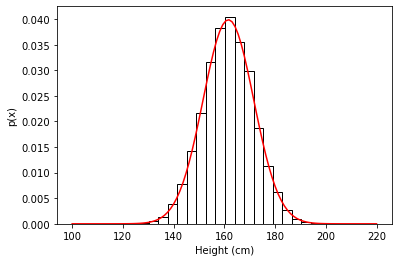

In [65]:
x=np.linspace(100,220,100) # set up values of x (heights) to query 
sigma=10
mean=161.6
px=1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2.*((x-mean)/sigma)**2)
fig,ax=plt.subplots(1,1)
ax.plot(x,px,color='red')
out=ax.hist(heights,20,density=True,facecolor='white',edgecolor='black')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("p(x)")

Note how well it fits. Explore more below. 

Cumulative Distribution Function (CDF): 

\begin{aligned}
d(x)=\frac{1}{2}[erf(\frac{x}{\sqrt(2)})+1]
\end{aligned}

Where $x$ has been transformed into a ["standard normal distribution"](https://mathworld.wolfram.com/StandardNormalDistribution.html) -- i.e., with a mean of 0 and a standard deviation of 1, by subtracting the mean of $x$ ($\mu$) from each value, and then dividing by the standard deviation ($\sigma$). Note that $erf$ is the [error function](https://en.wikipedia.org/wiki/Error_function). 

Below, we evaluate and plot $d(x)$ for a prescribed range of heights, given a mean of $\mu$=161.6 cm and standard deviation of $\sigma$=10 cm. 

We also plot the empirical non-exceedance probability, simply defined as the fraction of the 10,000 member sample with heights above the same points in the arbitrary list. The code for this is included below, but there's no need to "learn it"; you can just observe/compare the empirical (red) and theroetical (blue) non-exceedance probabilities in the plot. 

Text(0, 0.5, 'd(x) [%]')

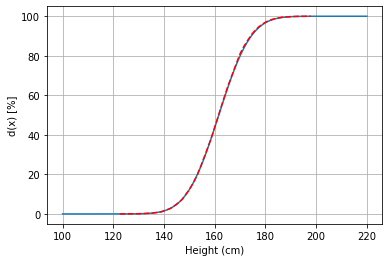

In [66]:
x_standard=(x-mean)/sigma # Convert to standard normal
dx=np.array([1/2.*(erf(i/np.sqrt(2))+1)*100 for i in x_standard]) # compute d(x)
empirical_dx=np.array([100-np.sum(heights>i)/np.float(len(heights))*100 for i in heights]) # empirical d(x)
# Plot
fig,ax=plt.subplots(1,1)
ax.plot(x,dx)
ax.plot(heights[np.argsort(heights)],empirical_dx[np.argsort(heights)],color='red',linestyle='--')
ax.grid()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("d(x) [%]")

What is the upper bound?


### Parametric distributions provide a "smoothed" estimate 

If you're having trouble spotting the difference between the red and blue curves, that's no surpise. As with the comparison between $p(x)$ and the histogram, we note that the match is very close because our sample of heights is large (10,000 members) and is drawn from a normal distribution. Had our sample been smaller, it is more likely that our empirical estimate of non-exceedance probability would look a little different -- even if drawn from the same normal distribution. Why? Well, broadly speaking, the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) indicates that probabilities converge on their "expected" values with a sufficiently large number of trials. In this case, the number of trials is the sample size of heights. 

To illustrate the effect of decreasing the sample size, run the code below. 


They are so similar because our sample ("heights") comes from -- note extrapolation. Evaluate inverse of the CDF using scipy.stats

Highlight family of statistical distributions. 

Leave some questions 

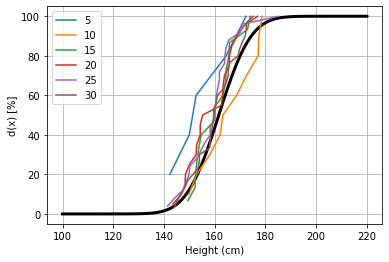

In [67]:
fig,ax=plt.subplots(1,1)
ax.plot(x,dx,color="black",linewidth=3)
for size in [5,10,15,20,25,30]:
    sample=np.random.normal(loc=161.6,scale=10,size=size)
    empirical_dx=np.array([100-np.sum(sample>i)/np.float(len(sample))*100 for i in sample])
    ax.plot(sample[np.argsort(sample)],empirical_dx[np.argsort(sample)],label="%.0f"%size)
ax.grid()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("d(x) [%]")   
ax.legend()

As should be clear from the above, the larger sample size, the closer the empirical estimate to the population $d(x)$. 

So, there are two reasons why we might want to use a probability distribution to assess frequency (or "rarity") rather than an empirical estimate: 

(1) It enables us to extrapolate beyond the bounds of our observation;
(2) It smoothes out batch-to-batch sampling variation (most problematic with small sample sizes). 

There are, however, considerable challenges to using a probability distribution. **First**, we must select the *right* distribution. In the above this was the *normal* distribution, but *many* others exist, and we must decide which (we think) describes the population we are dealing with. **Second**, we must identify the values for the paramaters that describe the given probability distribution (i.e., its shape). In the case of the normal distribution, we need to quantify two paramaters: the mean and standard deviation; but some other distributions require more paramaters to be set. Both of these "challenges" exist because we must *estimate* both the distribution *and* its paramaters from a finite sample. As I hope is intuitive from the example above, the larger the sample, the closer we should get to the right answer. However, we can never be sure we have the "right" probability distribution and paramaters for the population -- only that statisticallly it is *unlikely* that we are wrong. At appropriate points throughout the course I will demonstrate some of the tools we use to assess whether our sample is a good match for a given probability distribution.

To appreciate the diversity of probability distributions, though, run the code below to plot $p(x)$ for a range of commonly used distributions. Notice how well many of them appear to fit our sample! (The "right" distribution is the normal distribuion -- top left). A longer list of distributions availble in one of python's statistics modules is included [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html). 

You should then proceed to the **Questions** section for your home/self-guided working. 

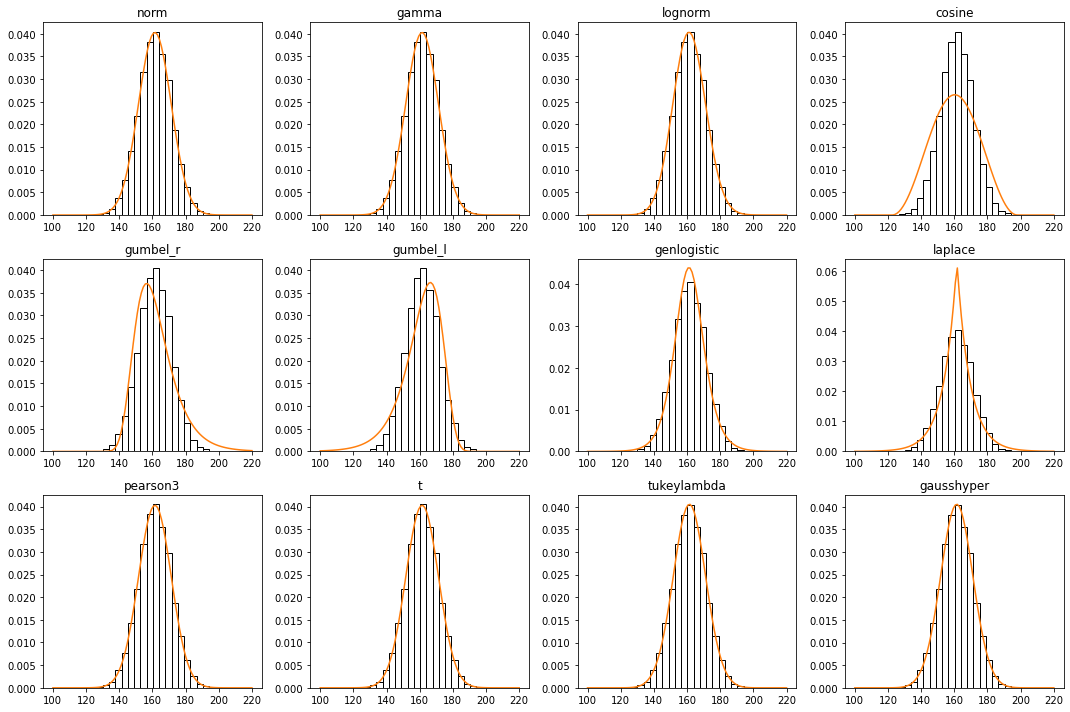

In [68]:
dists=["norm","gamma","lognorm","cosine","gumbel_r","gumbel_l","genlogistic","laplace","pearson3","t",
      "tukeylambda","gausshyper"]
p=stats.expon.pdf(xref)
fig,ax=plt.subplots(3,4)
fig.set_size_inches(15,10)
for i in range(len(dists)):
    d=getattr(stats,dists[i])
    params=d.fit(heights)
    if len(params)==2:
        p=d.pdf(x,params[0],params[1])
    elif len(params)==3:
        p=d.pdf(x,params[0],params[1],params[2])
    out=ax.flat[i].hist(heights,20,density=True,facecolor='white',edgecolor='black')
    ax.flat[i].plot(x,p)
    ax.flat[i].set_title(dists[i])
plt.tight_layout()

## Self working

Please answer/complete the following. We will go through the answers in the next practical, so it is essential that you complete them ahead of time. 

[1] A lottery machine hold 59 coloured balls, each labelled with a different number from 1-59. What is the probability that the first number to emerge is greater than 50?

[2] Imagine sampling from the lottery machine many, many times. Each time you make a note of the number, replace the ball, before drawing again on the next go. At the end of your mammoth sampling effort, you have a list of numbers that constitutes your dataset. Sketch how you think a histogrom of these data would look. 

[3] Repeat the thought experiment in [2], but this time imagine that in each sample you selected 6 balls and added them up and wrote down this sum. How does the histogram of this dataset look?

[2] Read the folllowing papers and, for each, identify (a) which meterorological quantity probability distributions the authors assess; and (b) which probability distribution they use to assess the rarity of an event. 

Papers: 
- [Matthews et al.(2020)](https://iopscience.iop.org/article/10.1088/1748-9326/aa98c8)
- [Matthews et al. (2016)](https://www.sciencedirect.com/science/article/pii/S221209631600005X) 
- [Schar et al. (2004)](https://www.nature.com/articles/nature02300) 
- [Bloemendaal et al. (2020)](https://www.nature.com/articles/s41597-020-00720-x)


